
Tarea Semana 11 - Métodos Computacionales 1

Punto 24:
La probabilidad experimental de 1 par es 0.414
La probabilidad teórica de 1 par es 5/12 = 0.417

Punto 25:
La probabilidad experimental de 1 par es 0.461
La probabilidad teórica de 1 par es 25/54 = 0.463
La probabilidad experimental de 2 pares es 0.233
La probabilidad teórica de 2 pares es 25/108 = 0.231

Punto 28:
La probabilidad experimental de dos caras y dos sellos es 0.375
La probabilidad teórica de dos caras y dos sellos es 3/8 = 0.375

Punto 29:
La probabilidad máxima obtenida es 0.455, con p1 = 0.9 y p2 = 0.1
La probabilidad mínima obtenida es 0.295, con p1 = 0.1 y p2 = 0.1


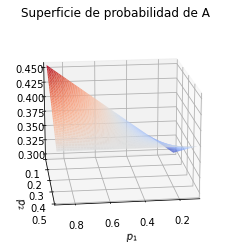

Disclaimer: los resultados del enunciado y de la Figura 1 del PDF de la tarea son diferentes. Hicimos este punto teniendo en cuenta los valores del enunciado.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


"""  /// punto 24 \\\ """

def punto24():

    Ntrials = int(1e5)

    results = np.zeros((Ntrials,3))

    for i in range(Ntrials):
        d1 = np.random.randint(1,7)
        d2 = np.random.randint(1,7)
        d3 = np.random.randint(1,7)
        results[i] = [d1,d2,d3]

    it = 0

    for R in results:
        
        for i in range(len(R)-1):
            
            # Ordenamos la lista
            R.sort()
            
            if R[i] == R[i+1]:
                
                a = R[i]
                
                if a not in R[i+2:] and a not in R[:i]:
                    
                    it += 1
    
    print(f'La probabilidad experimental de 1 par es {round(it/Ntrials,3)}')
    print(f'La probabilidad teórica de 1 par es 5/12 = {round(5/12,3)}')




"""  /// punto 25 \\\ """

def punto25():

    Ntrials = int(1e5)

    results = np.zeros((Ntrials,5))

    for i in range(Ntrials):
        d1 = np.random.randint(1,7)
        d2 = np.random.randint(1,7)
        d3 = np.random.randint(1,7)
        d4 = np.random.randint(1,7)
        d5 = np.random.randint(1,7)
        results[i] = [d1,d2,d3,d4,d5]

    it1 = 0
    it2 = 0

    for R in results:
        
        R.sort()
        pares = 0

        for i in range(len(R)-1):

            if R[i] == R[i+1]:
                
                a = R[i]

                if a not in R[i+2:] and a not in R[:i]:
                    
                    pares += 1

                    if len(R[i+2:]) == 3 and R[i+2:][-1] == R[i+2:][0]:

                        pares -= 1
                    
                    elif len(R[:i]) == 3 and R[:i][-1] == R[:i][0]:

                        pares -= 1

        if pares == 1:
            it1 += 1
        elif pares == 2:
            it2 += 1

    print(f'La probabilidad experimental de 1 par es {round(it1/Ntrials,3)}')
    print(f'La probabilidad teórica de 1 par es 25/54 = {round(25/54,3)}')
    print(f'La probabilidad experimental de 2 pares es {round(it2/Ntrials,3)}')
    print(f'La probabilidad teórica de 2 pares es 25/108 = {round(25/108,3)}')




"""  /// punto 28 \\\ """

def punto28():

    Ntrials = int(1e5)

    results = np.zeros((Ntrials,4))
    opciones=[-1,1]

    for i in range(Ntrials):
        l1 = np.random.choice(opciones)
        l2 = np.random.choice(opciones)
        l3 = np.random.choice(opciones)
        l4 = np.random.choice(opciones)
        results[i] = [l1,l2,l3,l4]

    it = 0

    for R in results:
        
        if R[0] + R[1] + R[2] + R[3] == 0:
            it += 1

    print(f'La probabilidad experimental de dos caras y dos sellos es {round(it/Ntrials,3)}')
    print(f'La probabilidad teórica de dos caras y dos sellos es 3/8 = {3/8}')






"""  /// punto 29 \\\ """

def punto29():

    Npoints = 100

    listap1 = np.linspace(0.1, 0.9, Npoints)
    listap2 = np.linspace(0.1, 0.5, Npoints)

    X,Y = np.meshgrid(listap1,listap2)
    Z = np.zeros((len(listap1), len(listap2)))


    minimo = [0,0,1]
    maximo = [0,0,0]

    for i in range(len(listap1)):
        p1 = listap1[i]

        for j in range(len(listap2)):
            p2 = listap2[j]

            ccss = p1*p2*0.5*0.5
            cscs = p1*(1-p2)*0.5*0.5
            cssc = p1*(1-p2)*0.5*0.5

            sccs = (1-p1)*p2*0.5*0.5
            scsc = (1-p1)*p2*0.5*0.5
            sscc = (1-p1)*(1-p2)*0.5*0.5

            prob = ccss+cscs+cssc+sccs+scsc+sscc
            if prob > maximo[2]:
                maximo = [p1,p2,prob]

            if prob < minimo[2]:
                minimo = [p1,p2,prob]
            
            Z[j][i] = prob

    print(f"La probabilidad máxima obtenida es {maximo[2]},"\
            f" con p1 = {maximo[0]} y p2 = {maximo[1]}")
    print(f"La probabilidad mínima obtenida es {round(minimo[2],3)},"\
            f" con p1 = {minimo[0]} y p2 = {minimo[1]}")

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1,projection='3d', elev = 17, azim = 83)
    ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
    ax.set_xlim(0.1, 0.9)
    ax.set_ylim(0.1, 0.5)
    ax.set_title(r'Superficie de probabilidad de A', fontsize=12)
    ax.set_xlabel(r'$p_1$',fontsize=10)
    ax.set_ylabel(r'$p_2$',fontsize=10)
    plt.show()

    print("Disclaimer: los resultados del enunciado y de la Figura 1"\
        " del PDF de la tarea son diferentes. Hicimos este punto teniendo en"\
        " cuenta los valores del enunciado.")



def main():
    print('\nTarea Semana 11 - Métodos Computacionales 1')

    print("\nPunto 24:")
    punto24()

    print("\nPunto 25:")
    punto25()

    print("\nPunto 28:")
    punto28()
    
    print("\nPunto 29:")
    punto29()
    print("")

if __name__ == '__main__':
    main()
